In [1]:
# Importing libraries
import os
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, precision_score, accuracy_score
from sklearn.metrics import accuracy_score

In [7]:
framePath = "../DataFormating/DataFrame/testdataframe.pkl"
modelPath = "../models/img_model.p"

# importing the Dataframe created from project1_Data_Frame
with open (framePath, 'rb') as f:
    df = pickle.load(f)

print(df.head(10))
print(df.shape)

          0         1         2         3         4         5         6  \
0  0.270588  0.207843  0.250980  0.286275  0.223529  0.266667  0.294118   
1  0.274510  0.227451  0.274510  0.266667  0.219608  0.266667  0.286275   
2  0.427451  0.368627  0.529412  0.290196  0.235294  0.372549  0.270588   
3  0.384314  0.286275  0.443137  0.415686  0.309804  0.509804  0.552941   
4  0.392157  0.278431  0.466667  0.650980  0.541176  0.729412  0.454902   
5  0.282353  0.203922  0.250980  0.290196  0.211765  0.258824  0.290196   
6  0.384314  0.282353  0.325490  0.356863  0.254902  0.305882  0.380392   
7  0.274510  0.211765  0.250980  0.286275  0.223529  0.262745  0.313725   
8  0.274510  0.203922  0.250980  0.278431  0.207843  0.254902  0.298039   
9  0.286275  0.207843  0.254902  0.290196  0.211765  0.258824  0.298039   

          7         8         9  ...    150519    150520    150521    150522  \
0  0.223529  0.270588  0.290196  ...  0.250980  0.207843  0.231373  0.254902   
1  0.223529  0

In [8]:
X = df.drop('Target', axis=1)
y = df['Target']

In [9]:
# Load the pre-trained model
import os

if os.path.exists(modelPath):
    # Load the pickled model
    with open(modelPath, 'rb') as f:
        model = pickle.load(f)
    print(f"✅ Model loaded successfully from {modelPath}")
    print(f"Model type: {type(model)}")
    print(f"Model summary:")
    if hasattr(model, 'summary'):
        model.summary()
else:
    print(f"Model file not found at {modelPath}")
    print(f"Checked path: {os.path.abspath(modelPath)}")

✅ Model loaded successfully from ../models/img_model.p
Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Model summary:


C:\Users\makjo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


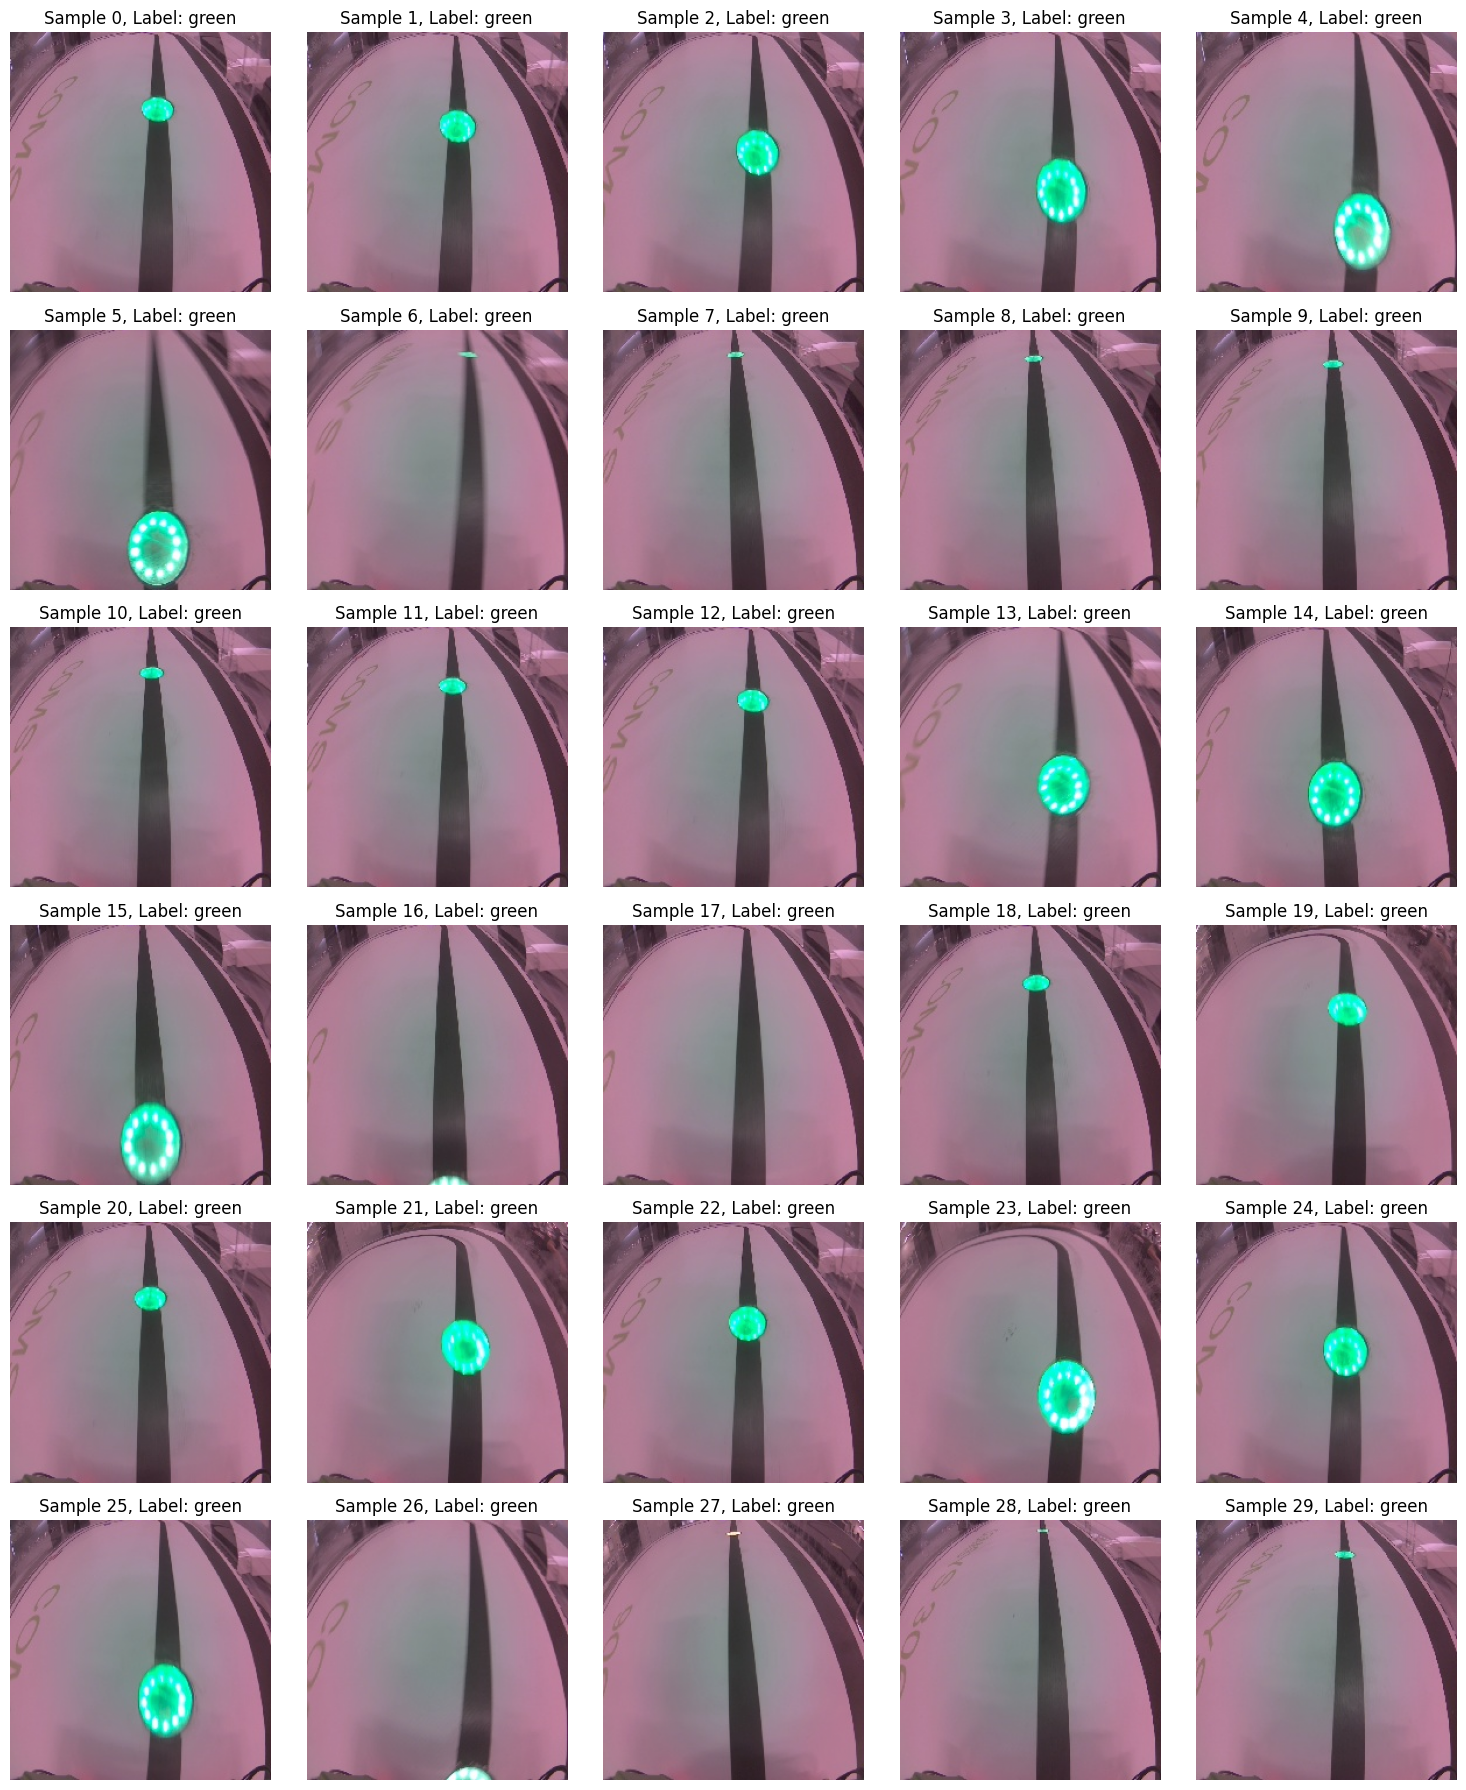

In [10]:
import matplotlib.pyplot as plt

# Display first 30 images in a grid
fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # 6 rows x 5 cols = 30 images
axes = axes.flatten()  # Flatten to 1D array for easier indexing

for i in range(30):
    img = X.iloc[i].values.reshape(224, 224, 3)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Sample {i}, Label: {y.iloc[i]}")
    axes[i].axis('off')  # Hide axes 

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions using the loaded model
# y_pred_prob = model.predict(X)  # Predict on the first 30 samples
for i in range(30):
    # print(X[0:][i])
    
    prediction = model.predict_proba(X[0:][i])
    print(prediction[0])

# prediction = model.predict_proba(X)



# Check the shape of predictions
print(f"Prediction shape: {prediction.shape}")
print(f"Prediction dtype: {prediction.dtype}")
print(f"First 30 predictions:\n{prediction[:30]}")

# Handle both cases: if output is 1D or 2D
if len(y_pred_prob.shape) == 1:
    # Model already outputs class indices
    y_pred = y_pred_prob.astype(int)
    print("\n✅ Model outputs class indices directly (1D array)")
elif len(y_pred_prob.shape) == 2 and y_pred_prob.shape[1] > 1:
    # Model outputs probabilities for each class
    y_pred = np.argmax(y_pred_prob, axis=1)
    print(f"\n✅ Model outputs {y_pred_prob.shape[1]} class probabilities (2D array)")
else:
    # Single probability output
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    print("\n✅ Binary classification (single probability output)")

# print(f"\nFinal predictions shape: {y_pred.shape}")
print(f"Unique classes: {np.unique(y_pred)}")

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.